In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('economic_index.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
#drop unnecessary column
df.drop(columns = ['Unnamed: 0','year','month'],axis=1,inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [9]:
#doing some visualization
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


<Figure size 900x900 with 0 Axes>

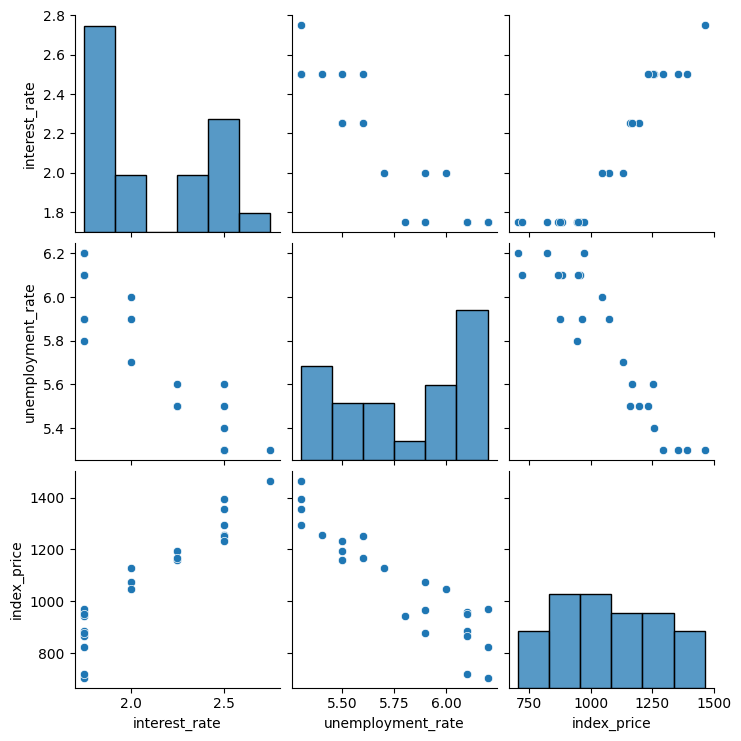

In [14]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.pairplot(df)

In [15]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

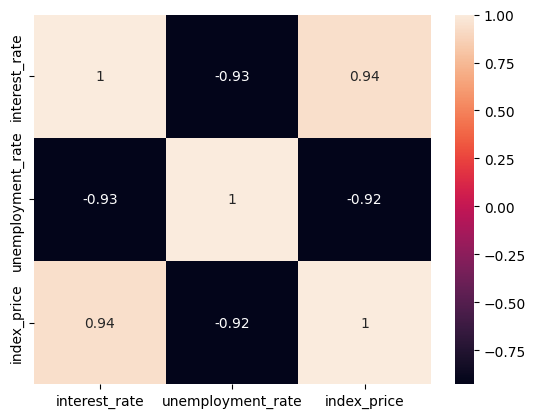

In [16]:
sns.heatmap(df.corr(),annot=True)

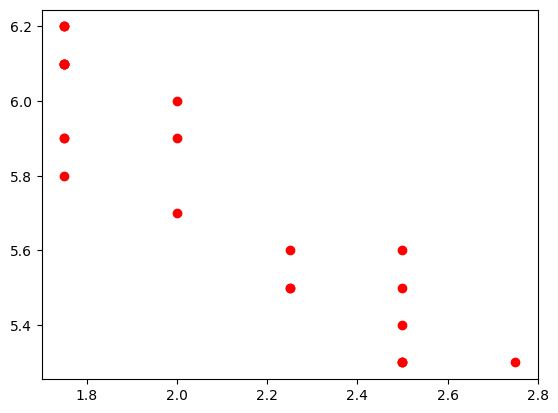

In [19]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')

In [20]:
#independent and dependent variable
X = df[['interest_rate','unemployment_rate']]

In [21]:
Y = df['index_price']

In [22]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.25,random_state=42)

In [29]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [33]:
regression.fit(X_train,Y_train)

LinearRegression()

In [34]:
#  cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)
# here we'll get mse in negative sign


In [35]:
np.mean(validation_score)

np.float64(-7820.756240551772)

In [38]:
## prediction
y_pred = regression.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

10540.34650966987
83.38702817650189
102.66618971048779


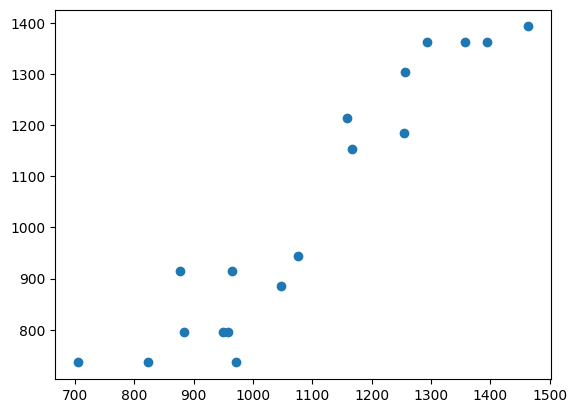

In [40]:
# Assumption
plt.scatter(Y_test,y_pred)

In [41]:
residuals = Y_test - y_pred
print(residuals)

8     -54.531100
16    235.052632
0      71.090909
18     88.411483
11    130.081340
9      13.110048
13     50.129187
1      31.138756
21     86.052632
5      70.062201
2      -5.861244
12    161.722488
15    162.411483
3     -69.861244
4     -47.220096
22    -31.947368
17    153.411483
20    -38.870813
Name: index_price, dtype: float64


/var/folders/ck/tj_z0jk1249ggvdcqp5pk2200000gn/T/ipykernel_2952/2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='index_price', ylabel='Density'>

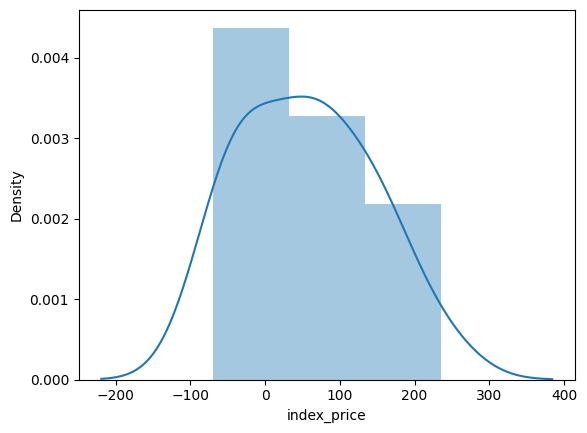

In [46]:
sns.distplot(residuals)
# if normal distribution curve is coming then the model yo've created is performing good

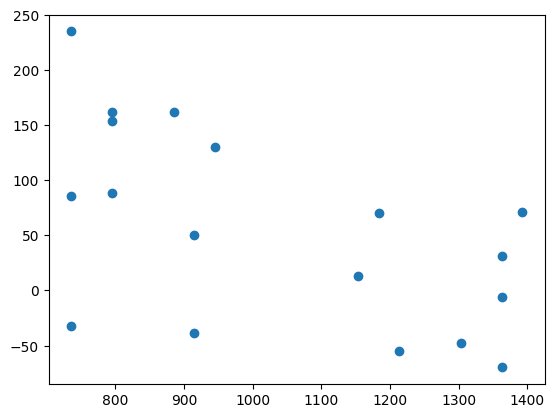

In [48]:
#scatter plot wrt predictions and residuals
plt.scatter(y_pred,residuals)
# if here data follows some patters then we have done anything wrong, if it doesnt follow pattern or is uniformly distributed then the model is fine.

In [49]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [50]:
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

In [51]:
model.summary()

/Users/user/Desktop/a/venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.455
Method:                 Least Squares   F-statistic:                            0.06202
Date:                Thu, 15 Aug 2024   Prob (F-statistic):                       0.941
Time:                        04:27:15   Log-Likelihood:                         -50.055
No. Observations:                   6   AIC:                                      104.1
Df Residuals:                       4   BIC:                                      103.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.6963   1044.618      0.033      0.975   -2865.627    2935.020
x2          -147.7716   1044.618     -0.141      0.894   -3048.095    2752.552
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.006
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.437
Skew:                           0.168   Prob(JB):                        0.804
Kurtosis:                       1.721   Cond. No.                         3.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(regression.coef_)


[  34.69626498 -147.77156853]
